# Writing data to and reading data from a database using Python

## Libraries and settings

In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import pandas as pd
import matplotlib.pyplot as plt

# Define settings for graphics
# plt.style.use('dark_background')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/data_ingestion/02_SQLite_database_Python


## Create sqlite data base

In [2]:
# Create data base
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

apartment_database.db


## Create empty SQL-table in the database

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS apartments_table (OrderId VARCHAR(50),
                                                                Rooms DECIMAL(8,2),
                                                                Area INT(8),
                                                                Price DECIMAL(8,2))''')
# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [4]:
# Read data
df = pd.read_csv('apartments_data_prepared.csv', 
                  sep=',', 
                  encoding='utf-8')[['web-scraper-order', 'rooms', 'area', 'price']]

# Calculate new variable
df['price_per_m2'] = df['price'] / df['area']

print(df.shape)
df.head(5)

(1008, 5)


,web-scraper-order,rooms,area,price,price_per_m2
0,1662023695-433,3.5,122.0,3180.0,26.065574
1,1662023745-820,2.5,78.0,3760.0,48.205128
2,1662023742-807,5.5,115.0,2860.0,24.869565
3,1662023804-1290,3.5,74.0,2165.0,29.256757
4,1662023739-771,5.5,195.0,6900.0,35.384615


## Write data to the SQL-table in data base

In [5]:
df.to_sql(name = 'apartments_table',
          con = conn,
          index = False,
          if_exists = 'replace')

1008

## Query the SQL-table

In [6]:
# Query the SQL-table
cursor.execute('''SELECT * FROM apartments_table 
                  WHERE Rooms >= 2.0 
                  AND Price > 1000''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Rooms','Area','Price', 'Price_per_m2'])    
print(df)

             OrderId  Rooms   Area   Price  Price_per_m2
0     1662023695-433    3.5  122.0  3180.0     26.065574
1     1662023745-820    2.5   78.0  3760.0     48.205128
2     1662023742-807    5.5  115.0  2860.0     24.869565
3    1662023804-1290    3.5   74.0  2165.0     29.256757
4     1662023739-771    5.5  195.0  6900.0     35.384615
..               ...    ...    ...     ...           ...
878   1662023749-858    5.5  123.0  2550.0     20.731707
879   1662023739-792    3.5   70.0  1465.0     20.928571
880   1662023745-835    2.5   56.0  1870.0     33.392857
881  1662023783-1112    3.5   70.0  2190.0     31.285714
882   1662023749-853    3.5   96.0  2260.0     23.541667

[883 rows x 5 columns]


## Plot histogram of rental prices

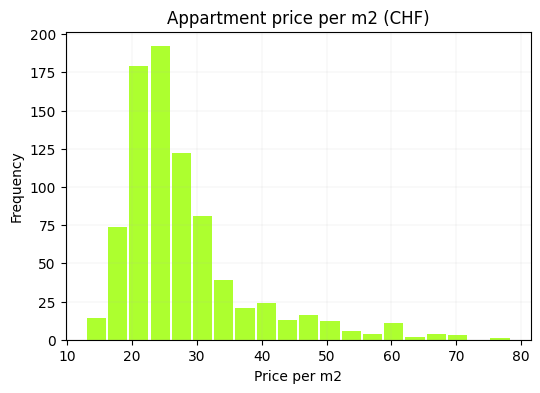

In [7]:
plt.figure(figsize=(6,4))
df['Price_per_m2'].plot.hist(grid=True, 
                   bins=20, 
                   rwidth=0.9,
                   color='greenyellow')
plt.title('Appartment price per m2 (CHF)')
plt.xlabel('Price per m2')
plt.ylabel('Frequency')
plt.grid(linestyle='-', linewidth=0.1)

conn.close()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-09 17:58:55
Python Version: 3.11.10
-----------------------------------
